In [1]:
import pandas as pd
import numpy as np
import statistics
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

In [2]:
df=pd.read_excel('C:\\Users\\eric.park\\Downloads\\vaccine_doses.xlsx')

In [3]:
dft=df[['report_date','previous_day_at_least_one','previous_day_fully_vaccinated','previous_day_3doses','previous_day_total_doses_administered']]

In [4]:
#Time Series

Text(0.5, 1.0, 'Vaccination Time Series')

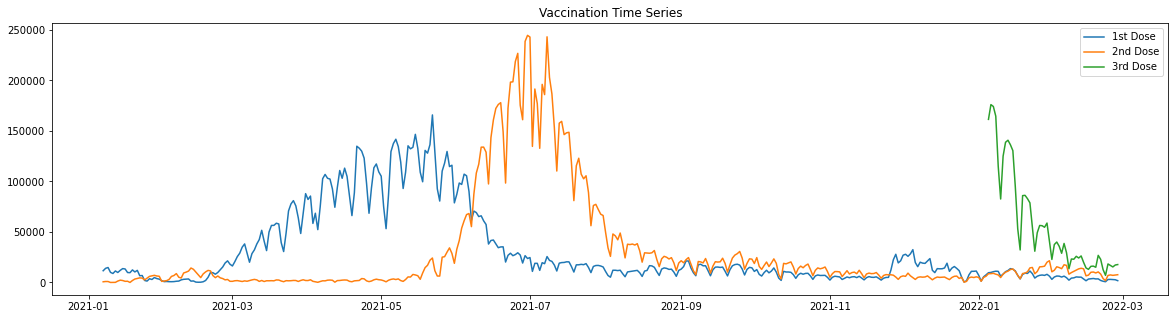

In [5]:
y_ax=dft['previous_day_at_least_one']
y_ax1=df['previous_day_fully_vaccinated']
y_ax2=df['previous_day_3doses']
x_ax=dft['report_date']

plt.figure(figsize=(20,5))
plt.plot(x_ax,y_ax,label='1st Dose')
plt.plot(x_ax,y_ax1,label='2nd Dose')
plt.plot(x_ax,y_ax2, label='3rd Dose')

plt.legend()
plt.title('Vaccination Time Series')

In [6]:
#ADF Test on each subset

In [7]:
#null hypothesis->data is not stationary

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
df1=dft[['report_date','previous_day_at_least_one']]
df1=df1.dropna()
#subset earliest 1st dose and 56 days from it
df1t=df1[(df1['report_date']>='2021-01-07')&(df1['report_date']<='2021-03-01')]

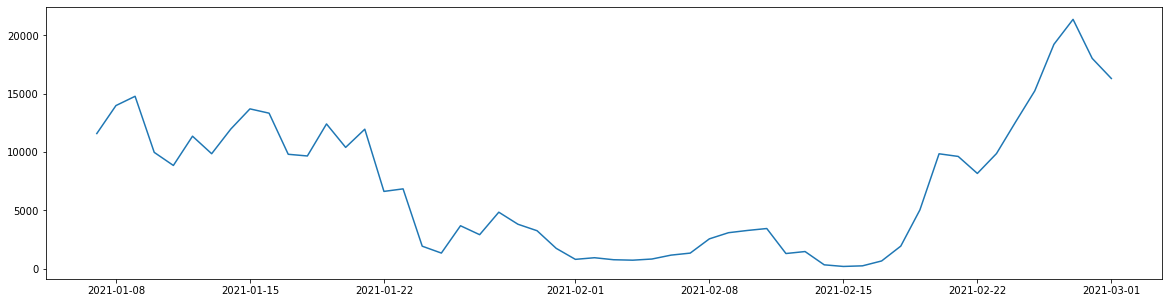

In [10]:
y_ax=df1t['previous_day_at_least_one']
x_ax=df1t['report_date']
plt.figure(figsize=(20,5))
plt.plot(x_ax,y_ax,label='1st Dose')

In [11]:
series=df1t[['previous_day_at_least_one']]
result=adfuller(series)
print(f'Test Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

Test Statistic: -2.1214787952108516
n_lags: 0.23596603211061434
p-value: 0.23596603211061434
Critial Values:
   1%, -3.5812576580093696
Critial Values:
   5%, -2.9267849124681518
Critial Values:
   10%, -2.6015409829867675


In [12]:
#does not reject null hypothesis because pvalue is greater than 0.05 & Test Statistics is greater than Critical Values
#This dataset is not stationary.

In [13]:
df2=dft[['report_date','previous_day_fully_vaccinated']]
df2=df2.dropna()
#subset earliest 2nd dose and 53 days from it
df2t=df2[(df2['report_date']>='2021-01-07')&(df1['report_date']<='2021-03-01')]

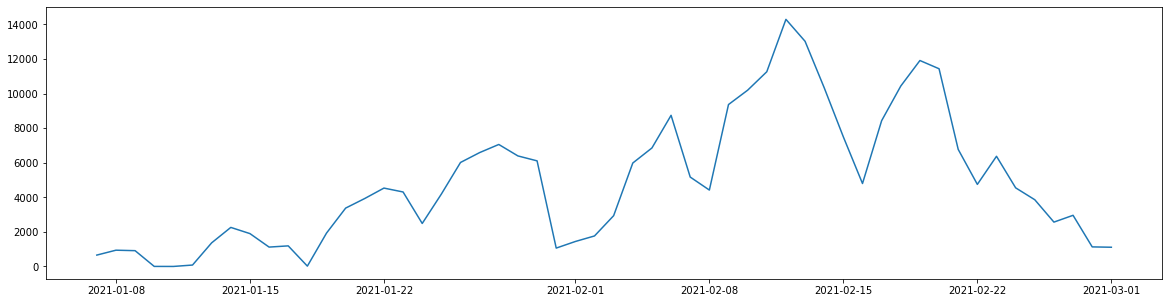

In [14]:
y_ax=df2t['previous_day_fully_vaccinated']
x_ax=df2t['report_date']
plt.figure(figsize=(20,5))
plt.plot(x_ax,y_ax,label='2nd Dose')

In [15]:
series1=df2t[['previous_day_fully_vaccinated']]
result1=adfuller(series1)
print(f'Test Statistic: {result1[0]}')
print(f'n_lags: {result1[1]}')
print(f'p-value: {result1[1]}')
for key, value in result1[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

Test Statistic: -2.3681257796390685
n_lags: 0.1509354633596432
p-value: 0.1509354633596432
Critial Values:
   1%, -3.562878534649522
Critial Values:
   5%, -2.918973284023669
Critial Values:
   10%, -2.597393446745562


In [16]:
#does not reject null hypothesis because pvalue is greater than 0.05 & Test Statistics is greater than Critical Values
#This dataset is not stationary.

In [17]:
df3=dft[['report_date','previous_day_3doses']]
df3=df3.dropna()

In [18]:
series2=df3[['previous_day_3doses']]
result=adfuller(series2)
print(f'Test Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

Test Statistic: -4.196999303352298
n_lags: 0.0006666490840921183
p-value: 0.0006666490840921183
Critial Values:
   1%, -3.5812576580093696
Critial Values:
   5%, -2.9267849124681518
Critial Values:
   10%, -2.6015409829867675


In [19]:
#Rejects null hypothesis because pvalue is less than 0.05 & Test Statistics is less than Critical Values
#This dataset is stationary.

In [20]:
#Seaonality decomposition

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

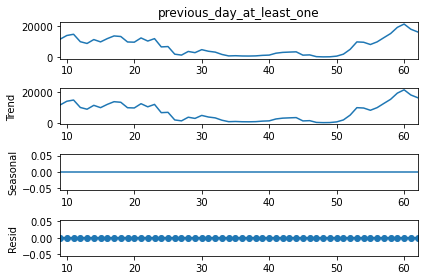

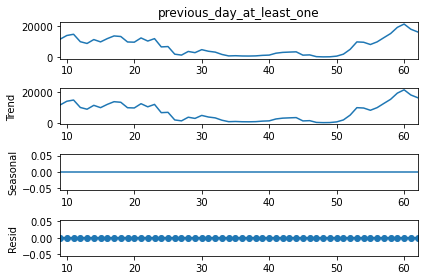

In [22]:
result = seasonal_decompose(df1t['previous_day_at_least_one'], model="additive", period=1)

trend = result.trend
seasonal = result.seasonal
residual = result.resid

result.plot()

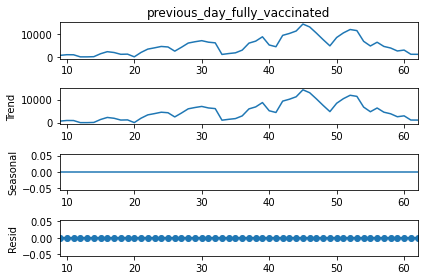

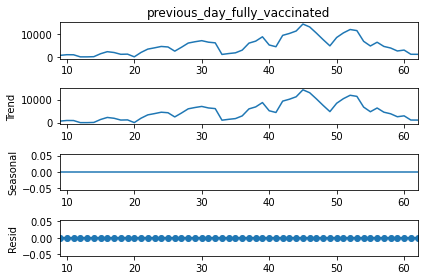

In [23]:
result1 = seasonal_decompose(df2t['previous_day_fully_vaccinated'], model="additive", period=1)

trend = result1.trend
seasonal = result1.seasonal
residual = result1.resid

result1.plot()

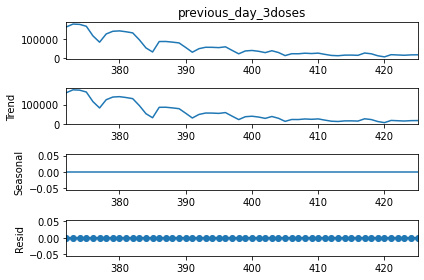

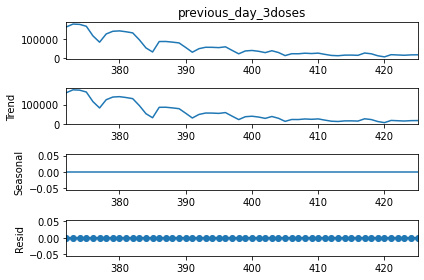

In [24]:
result2 = seasonal_decompose(df3['previous_day_3doses'], model="additive", period=1)

trend = result2.trend
seasonal = result2.seasonal
residual = result2.resid

result2.plot()

In [25]:
#Logarithmic Transformation

In [26]:
df1t_t=np.log(df1t['previous_day_at_least_one'])
df1_t=pd.DataFrame(data=df1t_t)
df1_t['previous_day_at_least_one_log']=df1_t['previous_day_at_least_one']
df1_t=df1_t[['previous_day_at_least_one_log']]
df_1_dose=pd.concat([df1_t,df1t],axis=1)
df_1_dose=df_1_dose[['report_date','previous_day_at_least_one_log']]

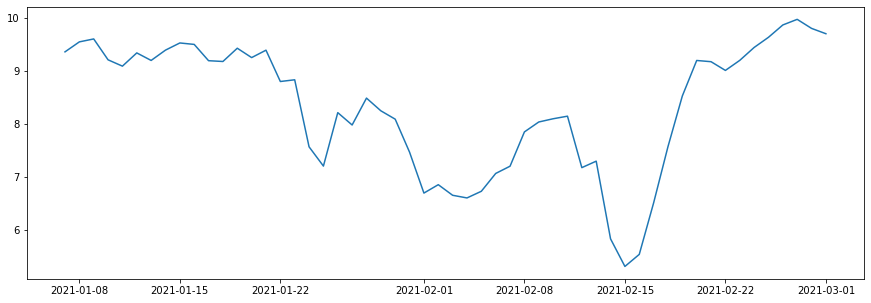

In [27]:
plt.figure(figsize=(15,5))
plt.plot(df_1_dose['report_date'],df_1_dose['previous_day_at_least_one_log'])

In [28]:
np.seterr(divide='ignore')
df2t['previous_day_fully_vaccinated']=df2t['previous_day_fully_vaccinated'].replace(0,0.01)

df2t_t=np.log(df2t['previous_day_fully_vaccinated'])
df2_t=pd.DataFrame(data=df2t_t)
df2_t['previous_day_fully_vaccinated_log']=df2_t['previous_day_fully_vaccinated']
df2_t=df2_t[['previous_day_fully_vaccinated_log']]
df_2_dose=pd.concat([df2_t,df2t],axis=1)
df_2_dose=df_2_dose[['report_date','previous_day_fully_vaccinated_log']]
df_2_dose['previous_day_fully_vaccinated_log'][df_2_dose['previous_day_fully_vaccinated_log']<0]=0

<ipython-input-28-98a15cc7eb4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2t['previous_day_fully_vaccinated']=df2t['previous_day_fully_vaccinated'].replace(0,0.01)


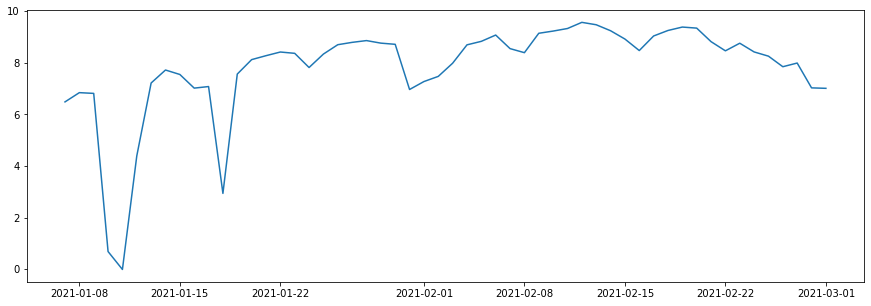

In [29]:
plt.figure(figsize=(15,5))
plt.plot(df_2_dose['report_date'],df_2_dose['previous_day_fully_vaccinated_log'])

In [30]:
df3t_t=np.log(df3['previous_day_3doses'])
df3_t=pd.DataFrame(data=df3t_t)
df3_t['previous_day_3doses_log']=df3_t['previous_day_3doses']
df3_t=df3_t[['previous_day_3doses_log']]
df_3_dose=pd.concat([df3_t,df3],axis=1)
df_3_dose=df_3_dose[['report_date','previous_day_3doses_log']]

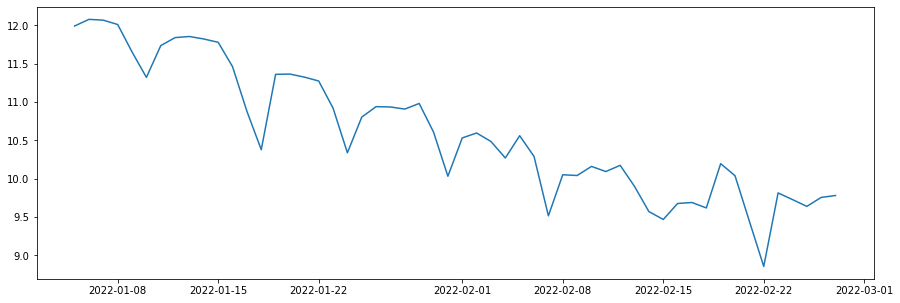

In [31]:
plt.figure(figsize=(15,5))
plt.plot(df_3_dose['report_date'],df_3_dose['previous_day_3doses_log'])

In [32]:
series5=df_1_dose[['previous_day_at_least_one_log']]
result5=adfuller(series5)
print(f'Test Statistic: {result5[0]}')
print(f'n_lags: {result5[1]}')
print(f'p-value: {result5[1]}')
for key, value in result5[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

Test Statistic: -2.516907188519608
n_lags: 0.11141462978447453
p-value: 0.11141462978447453
Critial Values:
   1%, -3.5656240522121956
Critial Values:
   5%, -2.920142229157715
Critial Values:
   10%, -2.598014675124952


In [33]:
#still Non Stationary. Most likely because the sample size is too small

In [34]:
series6=df_2_dose[['previous_day_fully_vaccinated_log']]
result6=adfuller(series6)
print(f'Test Statistic: {result6[0]}')
print(f'n_lags: {result6[1]}')
print(f'p-value: {result6[1]}')
for key, value in result6[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

Test Statistic: -1.6116171554962477
n_lags: 0.47712674610728717
p-value: 0.47712674610728717
Critial Values:
   1%, -3.584828853223594
Critial Values:
   5%, -2.9282991495198907
Critial Values:
   10%, -2.6023438271604937


In [35]:
#still Non Stationary. Most likely because the sample size is too small

In [36]:
#Differencing 

In [37]:
df1t['1st_dose_differencing']=df1t['previous_day_at_least_one']-df1t['previous_day_at_least_one'].shift(1)

<ipython-input-37-c4ed2955dca7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1t['1st_dose_differencing']=df1t['previous_day_at_least_one']-df1t['previous_day_at_least_one'].shift(1)


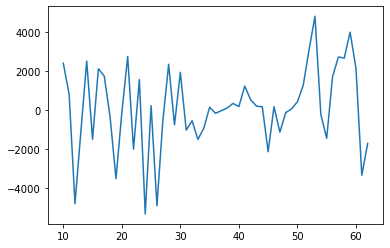

In [38]:
df1t['1st_dose_differencing'].plot()

In [39]:
series1=df1t[['1st_dose_differencing']]
result1=adfuller(series1.dropna())
print(f'Test Statistic: {result1[0]}')
print(f'n_lags: {result1[1]}')
print(f'p-value: {result1[1]}')
for key, value in result1[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

Test Statistic: -6.414842214971216
n_lags: 1.852205812488052e-08
p-value: 1.852205812488052e-08
Critial Values:
   1%, -3.562878534649522
Critial Values:
   5%, -2.918973284023669
Critial Values:
   10%, -2.597393446745562


In [40]:
#P-Value is less than 0.05, it rejects the null hypthesis. We can can conclude that data is stationary

In [41]:
df2t['2nd_dose_differencing']=df2t['previous_day_fully_vaccinated']-df2t['previous_day_fully_vaccinated'].shift(1)

<ipython-input-41-550471bcad15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2t['2nd_dose_differencing']=df2t['previous_day_fully_vaccinated']-df2t['previous_day_fully_vaccinated'].shift(1)


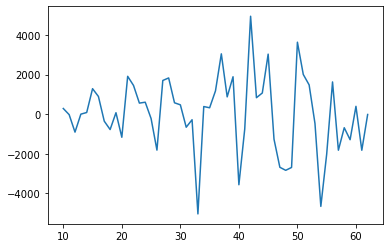

In [42]:
df2t['2nd_dose_differencing'].plot()

In [43]:
series4=df2t[['2nd_dose_differencing']]
result4=adfuller(series4.dropna())
print(f'Test Statistic: {result4[0]}')
print(f'n_lags: {result4[1]}')
print(f'p-value: {result4[1]}')
for key, value in result4[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

Test Statistic: -5.612074421073214
n_lags: 1.1971796068590797e-06
p-value: 1.1971796068590797e-06
Critial Values:
   1%, -3.5714715250448363
Critial Values:
   5%, -2.922629480573571
Critial Values:
   10%, -2.5993358475635153


In [44]:
#P-Value is less than 0.05, it rejects the null hypthesis. We can can conclude that data is stationary

In [45]:
#Forecast - ARIMA

In [46]:
#autocorrecation for 3rd Dose

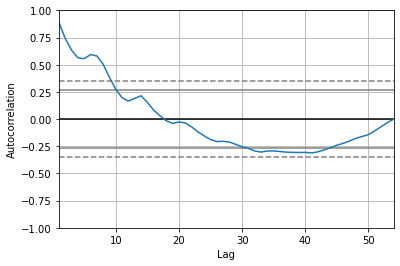

In [47]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df3['previous_day_3doses'])
plt.show()

<Figure size 864x576 with 0 Axes>

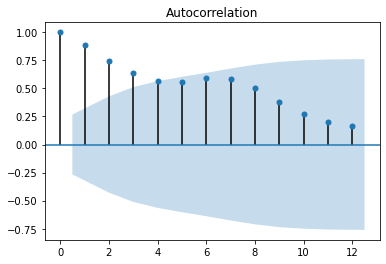

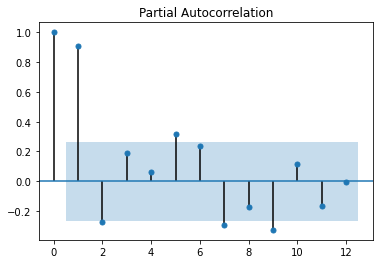

In [76]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.tsa.plot_acf(df3['previous_day_3doses'].dropna(),lags=12)
fig = sm.graphics.tsa.plot_pacf(df3['previous_day_3doses'].dropna(),lags=12)

In [91]:
from statsmodels.tsa.arima_model import ARIMA

In [92]:
model=ARIMA(df3['previous_day_3doses'],order=(6,0,4))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [93]:
model_fit=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [94]:
model_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     previous_day_3doses   No. Observations:                   54
Model:                      ARMA(6, 4)   Log Likelihood                -587.041
Method:                        css-mle   S.D. of innovations          11131.878
Date:                 Mon, 07 Mar 2022   AIC                           1198.082
Time:                         02:34:21   BIC                           1221.949
Sample:                              0   HQIC                          1207.286
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      5.705e+04   5.92e+04      0.964      0.335    -5.9e+04    1.73e+05
ar.L1.previous_day_3doses     2.1523      0.070     30.697      0.000       2.015       2.290
ar.L2.previous_day_3doses    -2.7539      0.119    -23.069      0.000      -2.988      -2.520
ar.L3.previous_day_3doses     2.8910      0.140     20.680      0.000       2.617       3.165
ar.L4.previous_day_3doses    -2.4574      0.148    -16.616      0.000      -2.747      -2.168
ar.L5.previous_day_3doses     1.4148      0.135     10.480      0.000       1.150       1.679
ar.L6.previous_day_3doses    -0.2576      0.075     -3.453      0.001      -0.404      -0.111
ma.L1.previous_day_3doses    -1.2195      0.086    -14.131      0.000      -1.389      -1.050
ma.L2.previous_day_3doses     1.2649        nan        nan        nan         nan         nan
ma.L3.previous_day_3doses    -1.2195        nan        nan        nan         nan         nan
ma.L4.previous_day_3doses     1.0000      0.097     10.297      0.000       0.810       1.190
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2124           -0.9774j            1.0003           -0.2841
AR.2           -0.2124           +0.9774j            1.0003            0.2841
AR.3            1.0104           -0.0000j            1.0104           -0.0000
AR.4            0.7190           -0.7681j            1.0521           -0.1303
AR.5            0.7190           +0.7681j            1.0521            0.1303
AR.6            3.4696           -0.0000j            3.4696           -0.0000
MA.1           -0.2212           -0.9752j            1.0000           -0.2855
MA.2           -0.2212           +0.9752j            1.0000            0.2855
MA.3            0.8309           -0.5564j            1.0000           -0.0939
MA.4            0.8309           +0.5564j            1.0000            0.0939
-----------------------------------------------------------------------------
"""

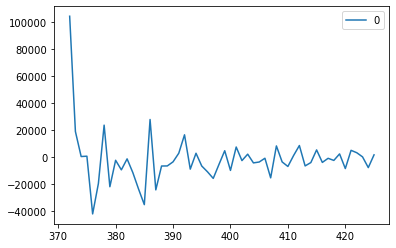

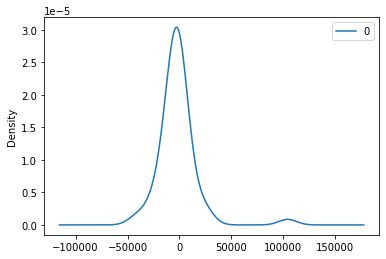

                   0
count      54.000000
mean    -1779.666566
std     19247.597915
min    -42313.090314
25%     -8461.030166
50%     -3198.009703
75%      2598.489419
max    104434.300320


In [95]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

Text(0.5, 1.0, '3rd Dose ARIMA Model')

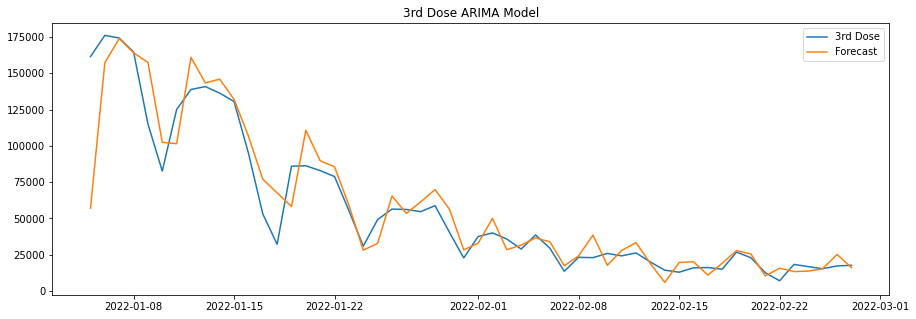

In [102]:
df3['forecast']=model_fit.predict(dynamic=False)

y_ax=df3['previous_day_3doses']
y_ax1=df3['forecast']
x_ax=df3['report_date']

plt.figure(figsize=(15,5))
plt.plot(x_ax,y_ax,label='3rd Dose')
plt.plot(x_ax,y_ax1,label='Forecast')


plt.legend()
plt.title('3rd Dose ARIMA Model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


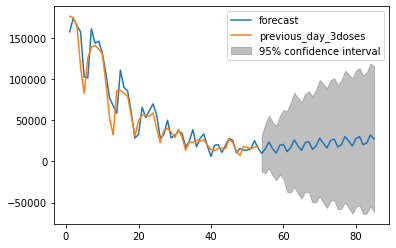

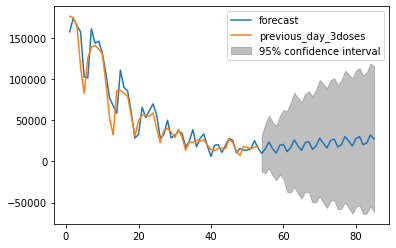

In [119]:
model_fit.plot_predict(start=1,end=85, alpha=0.05)